# Example: Another Look at Sorting - The `Quicksort` Algorithm
In this example, we compare the average runtime of a recursive [Quicksort](https://en.wikipedia.org/wiki/Quicksort) implementation to our previous [Bubblesort implementation](https://en.wikipedia.org/wiki/Bubble_sort) and [Julia's built-in sort function](https://docs.julialang.org/en/v1/base/sort/#Base.sort)

* [Quicksort](https://en.wikipedia.org/wiki/Quicksort) is a sorting algorithm that works by selecting a `pivot element` and partitioning the remaining elements into two sub-arrays based on their value relative to the pivot. The algorithm then recursively sorts the sub-arrays until they have less than two elements. The choice of pivot is critical for the algorithm's efficiency.

## Setup
This example uses functions encoded in the `src` directory and external third-party packages. In the `Include.jl` file, we load these functions to access them, set some required paths for this example and load external packages.

In [1]:
include("Include.jl");

  Activating project at `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-4/L4c`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-4/L4c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-4/L4c/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-4/L4c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-4/L4c/Manifest.toml`


In [2]:
max_number_of_trials = 12;
number_of_items_per_trial = [2^i for i ∈ 1:max_number_of_trials]; # this is an array comprehension, yet another iteration pattern!

## Bubblesort

### Check: Let's double-check our `bubblesort` implementation
Let's use the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to check that our implementation of `bubblesort` works. 
* We'll generate a random vector of integers and compare our sorted answer with the output of the [built-in sort function in Julia](https://docs.julialang.org/en/v1/base/sort/#Base.sort). If this test _fails_, the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) will throw an [AssertionError](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError). Otherwise, nothing happens, and we can go on with our fruitful and engaging lives

In [3]:
random_test_vector = rand(0:100,50);
@assert bubblesort(random_test_vector) == sort(random_test_vector)

Ok, so if we get here, all seems to be okay with our `bubble sort` implementation, so let's see how our code performs as we increase the vector size to be sorted. 

In [4]:
bubble_sort_data = DataFrame();
for i ∈ eachindex(number_of_items_per_trial)
    size_of_rand_vec_to_sort = number_of_items_per_trial[i];

    # run the test with different size vectors -
    test_run = @benchmarkable bubblesort(data) setup=(data=rand(0:number_of_items_per_trial[end],$(size_of_rand_vec_to_sort)));
    tune!(test_run)
    results = run(test_run)

    # store the results -
    row = (
        n = size_of_rand_vec_to_sort,
        μ = mean(results.times),
        σ = std(results.times)
    );
    push!(bubble_sort_data, row)
end

In [5]:
bubble_sort_data

Row,n,μ,σ
,Int64,Float64,Float64
1,2,14.0303,0.506087
2,4,18.7898,0.790269
3,8,31.5288,0.97934
4,16,91.7389,2.67715
5,32,338.612,7.42905
6,64,1774.26,103.613
7,128,7087.13,218.407
8,256,46571.2,2602.58
9,512,1.57948e5,3852.53


## Quicksort

### Check: Let's double-check our `quicksort` implementation
I've been up for a while, and I'm feeling a little weird. We'd better check our code. Let's use the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) to check that our implementation of `quicksort` is working. 
* We'll generate a random vector of integers and compare our sorted answer with the output of the [built-in sort function in Julia](https://docs.julialang.org/en/v1/base/sort/#Base.sort). If this test _fails_, the [@assert macro](https://docs.julialang.org/en/v1/base/base/#Base.@assert) will throw an [AssertionError](https://docs.julialang.org/en/v1/base/base/#Core.AssertionError). Otherwise, nothing happens, and we can go on and do great things (or create a [hedge fund](https://en.wikipedia.org/wiki/Hedge_fund) and spend the rest of our lives smoking weed on a [beach](https://www.cannonbeach.org/)). Whichever.

In [6]:
random_test_vector = rand(0:100,50);
@assert quicksort(random_test_vector) == sort(random_test_vector)

Ok, so if we get here, all seems to be okay with our `quicksort` implementation, so let's see how our code performs as we increase the vector size to be sorted. 

In [7]:
quick_sort_data = DataFrame();
for i ∈ eachindex(number_of_items_per_trial)
    size_of_rand_vec_to_sort = number_of_items_per_trial[i];

    # run the test with different size vectors -
    test_run = @benchmarkable quicksort(data) setup=(data=rand(0:number_of_items_per_trial[end],$(size_of_rand_vec_to_sort)));
    tune!(test_run)
    results = run(test_run)

    # store the results -
    row = (
        n = size_of_rand_vec_to_sort,
        μ = mean(results.times),
        σ = std(results.times)
    );
    push!(quick_sort_data, row)
end

In [8]:
quick_sort_data

Row,n,μ,σ
,Int64,Float64,Float64
1,2,197.946,266.597
2,4,430.447,746.581
3,8,946.251,1454.99
4,16,2167.46,9192.96
5,32,4779.02,15809.0
6,64,10565.3,33502.9
7,128,22660.8,93970.3
8,256,48553.6,1.38598e5
9,512,1.05548e5,2.08147e5


## What is the scaling of the Built-in sort function?

In [9]:
julia_sort_data = DataFrame();
for i ∈ eachindex(number_of_items_per_trial)
    size_of_rand_vec_to_sort = number_of_items_per_trial[i];

    # run the test with different size vectors -
    test_run = @benchmarkable sort(data) setup=(data=rand(0:number_of_items_per_trial[end],$(size_of_rand_vec_to_sort)));
    tune!(test_run)
    results = run(test_run)

    # store the results -
    row = (
        n = size_of_rand_vec_to_sort,
        μ = mean(results.times),
        σ = std(results.times)
    );
    push!(julia_sort_data, row)
end
julia_sort_data

Row,n,μ,σ
,Int64,Float64,Float64
1,2,68.0873,60.8775
2,4,70.2543,34.127
3,8,76.7093,46.4726
4,16,104.148,38.8348
5,32,200.715,56.8292
6,64,423.96,243.985
7,128,608.642,238.3
8,256,1504.21,5655.3
9,512,2628.27,11304.5


## Visualize
`Unhide` the code below to see how we plotted the average runtime of each sorting method as a function of the length of the vector $n$.

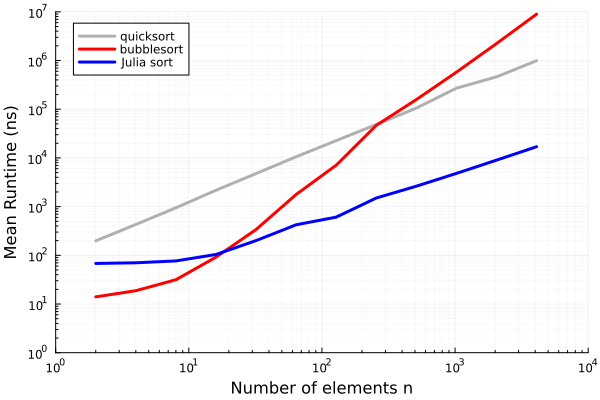

In [49]:
plot(quick_sort_data[:,:n], quick_sort_data[:,:μ], label="quicksort", 
    yscale=:log10, xscale=:log2, lw=3, c=:gray69, minorgrid=true, legend=:topleft)
plot!(bubble_sort_data[:,:n], bubble_sort_data[:,:μ], label="bubblesort", 
    yscale=:log10, xscale=:log10, lw=3, c=:red)
plot!(julia_sort_data[:,:n], julia_sort_data[:,:μ], label="Julia sort", 
    yscale=:log10, xscale=:log10, lw=3, c=:blue)
xlims!(1e+0, 1e+4)
ylims!(1e+0, 1e+7)
xlabel!("Number of elements n", fontsize=18)
ylabel!("Mean Runtime (ns)", fontsize=18)